# Homework Assignment 2, due Wednesday February 8th at noon


## Problem 1

In [Week 4 Lecture 2](../Week.4/Lecture.2.ipynb) we discussed [Euler's Method](https://en.wikipedia.org/wiki/Euler_method) for approximating solutions to first-order ODEs

$$\frac{dy}{dt} = f(t, y(t)).$$

In this homework problem, we ask you to implement Euler's method, as well as some other methods of approximating solutions for the ODE:

$$\frac{dy}{dt} = 1+y^2$$

and discuss the relative errors of the methods. 

a) Using Sympy, find the solution to the above **ODE** with $y(0)=0$. Plot the solution, and evaluate $y(1.5)$ as a floating-point, accurate to at least $10$ decimal places. 

b) Using Euler's method, approximate the solution with $y(0)=0$ for various step-lengths $\Delta t \in \{ \frac{1}{10}, \frac{1}{100}, \frac{1}{1000} \}$.  How small does $\Delta t$ need to be to get the Euler-approximate solution at $t=1.5$ to within $\frac{1}{10}$ of the actual solution?  Plot your approximate solutions, along with the exact solution from (a) in one plot, and be sure to include a legend. 

c) Implement the [**mid-point Euler method**](https://en.wikipedia.org/wiki/Euler_method), and repeat part (b) using this method.  The method can be summarized as the approximation:

$$ y(t + \Delta t) \simeq y(t) + (\Delta t) f\bigg(t+\frac{\Delta t}{2}, y(t) + \Delta t \frac{f(t,y(t))}{2}\bigg)$$

d) Repeat the steps of (b) using the approximation inspired by the second-order Taylor expansion of $y$:
$$ y(t + \Delta t) \simeq y(t) + (\Delta t)f(t, y(t)) + \frac{\Delta t^2}{2} \bigg( \frac{\partial f}{\partial t}(t,y(t)) + \frac{\partial f}{\partial y}(t,y(t)) f(t,y(t)) \bigg)$$
Let's call this the *second-order Euler method*. 

e) Which of these methods appears to have the smallest errors for a given step-length?  Do you see round-off error affecting any of your computations?   And is there any essential feature of the exact solution missing in your approximate solutions that you compute in parts (b), (c) and (d)? 

* * *

* * *

**Solution**: Let's write out the methods in detail for $f = 1 + y^2$. 

Euler $$ y \longmapsto y + \Delta t (1+y^2)$$

Mid-point Euler $$y \longmapsto y + \Delta t (1 + (y+\Delta t(1+y^2)/2)^2) = y + (\Delta t)(1+y^2) + (\Delta t)^2 y(1+y^2) + \frac{\Delta t^3}{4}(1+y^2)^2$$

2nd-order Euler $$ y \longmapsto y + (\Delta t)(1+y^2) + (\Delta t)^2 y (1+y^2)$$

As we can see from this, $y$ will always be positive, so all the terms in these summations will be positive.  So Mid-point Euler will be the largest of the estimates, and Euler the smallest.  The 2nd-order Euler method will be between the two estimates. 

A similar estimate would show the 3rd-order Euler method to be even more aggressive than the 2nd-order, although this is not part of the question. 

In [1]:
## Part (a)

import sympy as sp
y = sp.Function('y')
x = sp.Symbol('x', real=True)
ODE = sp.Eq( sp.Derivative( y(x), x), 1+y(x)**2)
sp.pprint(ODE)
SOL = sp.dsolve(ODE)
sp.pprint(SOL)
sp.srepr(SOL)
## this tells us our solution y(0)=0 is y(t) = tan(t)
print("Part (a): ",sp.tan(1.5).evalf(10))

d           2       
──(y(x)) = y (x) + 1
dx                  
y(x) = -tan(C₁ - x)
Part (a):  14.10141995


In [2]:
## Let's code it up. 
import sympy as sp

# for (b)
def stepE(y, dt):
    return y + dt*(1+y**2)

# for (c)
def stepMPE(y, dt):
    return y + dt*(1+y**2) + (dt**2)*(y*(1+y**2)) + ((dt**3)*(1+y**2)**2)/4

# for (d)
def step2E(y, dt):
    return y + dt*(1+y**2) + (dt**2)*(y*(1+y**2))

## builds the f-Euler estimate on the interval [a,b] using n subdivisions, 
##  the function f should be stepE, stepMPE or step2E as above. 
def buildEst(f, y0, a, b, n):
    dt = (b-a)/n
    xret = [a]
    yret = [y0]
    y = y0
    for i in range(n):
        y = f(y, dt)
        xret.append(xret[-1] + dt)
        yret.append(y)
    return (xret, yret) 

## something to return the exact solution, suitable for plotting
def exactSol(a,b,n):
    dt = (b-a)/n
    xvals = [a + i*dt for i in range(n+1)]
    yvals = [np.tan(xv) for xv in xvals]
    return (xvals, yvals)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
%matplotlib nbagg

<IPython.core.display.Javascript object>


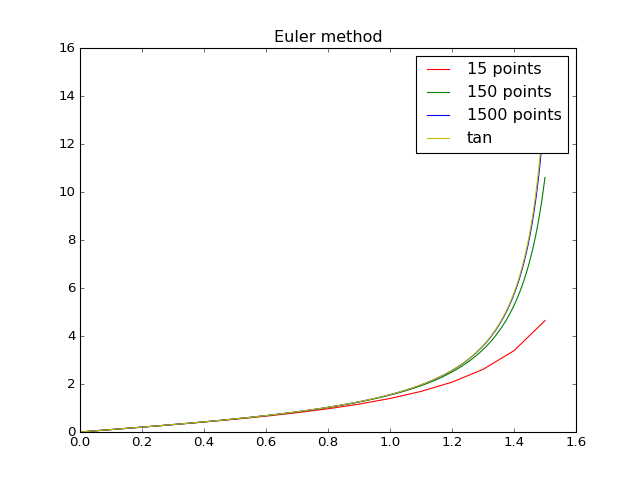

4.638812689611141
10.606172934063844
13.598986208186354
1/1000 not enough!
14.035692700038295


In [4]:
## part (b) - Euler method

steplens = [15, 150, 1500]
pltcol = ['r-', 'g-', 'b-']
datList = []

for n in steplens:
    datList.append(buildEst(stepE, 0, 0, 1.5, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label=str(steplens[i])+" points")

xv, yv = exactSol(0,1.5,1000)
plt.plot(xv, yv, 'y-', label="tan")

plt.legend()
plt.title("Euler method")

for P in datList:
    print(P[1][-1])
print("1/1000 not enough!")
## Delta t needs to be less than 125/100000 = 0.000125
print(buildEst(stepE, 0, 0, 1.5, 12000)[1][-1])

<IPython.core.display.Javascript object>


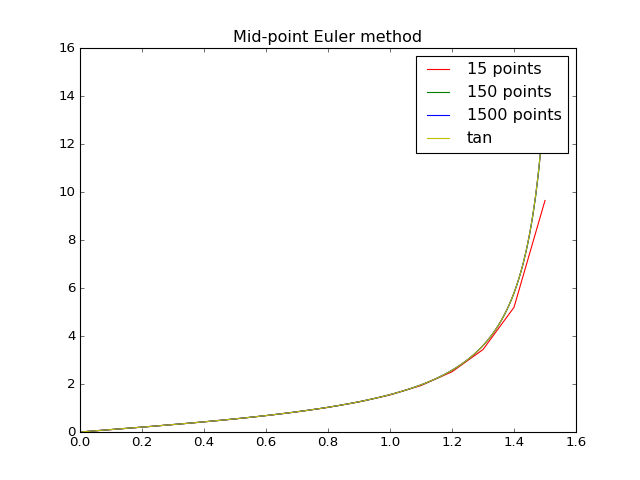

9.645499131713114
13.935798381787908
14.099530741954506


In [5]:
## part (c) - midpt Euler method
plt.close()

datList = []

for n in steplens:
    datList.append(buildEst(stepMPE, 0, 0, 1.5, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label=str(steplens[i])+" points")

xv, yv = exactSol(0,1.5,1000)
plt.plot(xv, yv, 'y-', label="tan")

plt.legend()
plt.title("Mid-point Euler method")

for P in datList:
    print(P[1][-1])
## Delta t = 1/1000 works, 1/100 almost works

<IPython.core.display.Javascript object>


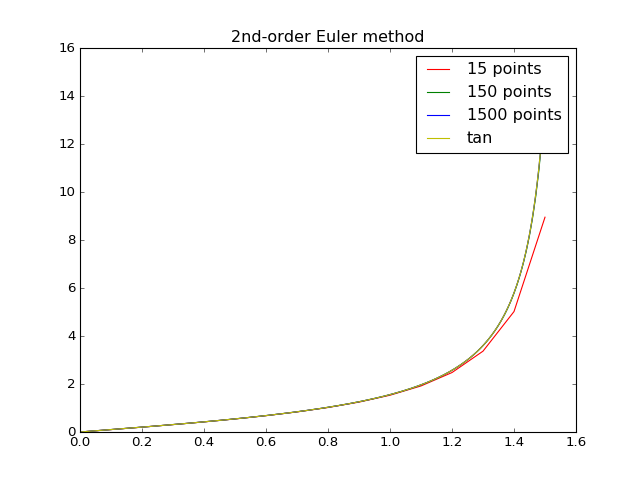

8.950183046495958
13.880675453284887
14.09884125577288


In [6]:
## part (d) - 2nd-order Euler method
plt.close()

datList = []

for n in steplens:
    datList.append(buildEst(step2E, 0, 0, 1.5, n))

for i in range(len(datList)):
    plt.plot(datList[i][0], datList[i][1], pltcol[i], label=str(steplens[i])+" points")
    
xv, yv = exactSol(0,1.5,1000)
plt.plot(xv, yv, 'y-', label="tan")

plt.legend()
plt.title("2nd-order Euler method")
for P in datList:
    print(P[1][-1])
## Delta t = 1/1000 works, 1/100 almost works

**Part (e)**

* Mid-point Euler seems to be the most accurate.  

* There is no noticable round-off error in these computations -- we are only using 1500 steps so we have relatively few "tiny" terms in our summations. 

* All of our solutions miss the vertical asymptote of the solution at $t=\frac{\pi}{2}$. In fact, none of the methods have the ability to predict vertical asymptotes. 

## Problem 2

Some 2d plots. . . let's also have them use sympy. 

Consider the function
$$ f(x,y) = \frac{\sin(xy)}{1+x^2+y^2}$$

a) Create an expression for this function in Sympy.  

b) Use Sympy's **lambdify** command to convert the expression into a callable function. 

c) Create a [contour plot](http://matplotlib.org/examples/pylab_examples/contour_demo.html) of your function created in (b) over the domain 
$$\{ (x,y) : -4 \leq x \leq 4, -4 \leq y \leq 4 \}$$
Ensure the contours $f=-0.24,-0.14,-0.08,0,0.08,0.15,0.24$ are visible and labelled as in the "single color - negative contours dashed" example. To display only these contours you will want to use the [**levels** keyword](http://matplotlib.org/examples/pylab_examples/contour_image.html). 

d) Compute $\frac{\partial f}{\partial x}$ using Sympy. 

e) Repeat (b) using $\frac{\partial f}{\partial x}$ instead of $f$. 

c) Repeat (c) using your function from (e). Use the same levels. 


In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a list of 34 text.Text objects>

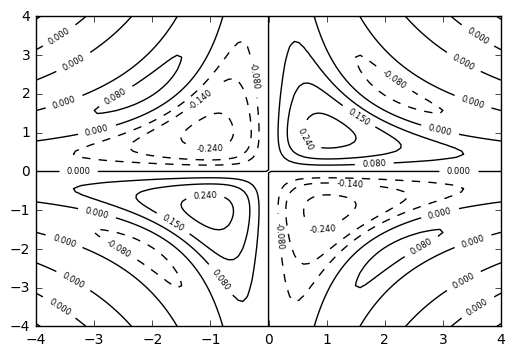

In [8]:
## (a)
x,y = sp.symbols('x y')
f = sp.sin(x*y)/(1+x**2+y**2)

## (b)
fl = sp.lambdify((x,y), f, "numpy")

X,Y = np.mgrid[-4:4:100j, -4:4:100j]

## (c)
CP = plt.contour(X,Y,fl(X,Y), colors='k', levels=[-0.24,-0.14,-0.08,0,0.08,0.15,0.24])
plt.clabel(CP, inline=1, fontsize=6)

<a list of 65 text.Text objects>

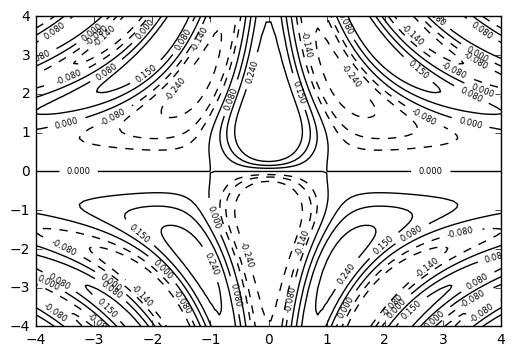

In [9]:
## (d)
fx = sp.diff(f,x)

## (e)
fxl = sp.lambdify((x,y), fx, "numpy")

X,Y = np.mgrid[-4:4:100j, -4:4:100j]

## (f)
CP = plt.contour(X,Y,fxl(X,Y), colors='k', levels=[-0.24,-0.14,-0.08,0,0.08,0.15,0.24])
plt.clabel(CP, inline=1, fontsize=6)

When you have completed the assignment, please save it to your **mp248** Bitbucket repository, in the file **Homework/asst.2.ipynb**

As before, your submission that will be graded will be the one in your repository at **noon** on the due date (Wednesday).  If you submit your assignment sufficiently-early, a *pre-grading script* will scan your assignment and notify you of any significant errors via your *CourseSpaces* "Simple Submissions" entry for Assignment 2. Please read the feedback item for details.  Also pay attention to the time-stamp, this will give you an idea of *when* the script read your submission. 
